## 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2. Loading dataset

In [2]:
df = pd.read_csv("titanic.csv")
test = pd.read_csv("titanic_test.csv")
combine = [df, test]

## 3. Inspecting data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### So we have to deal with NaN values based on the info for ("Age", "Cabin", "Embarked")

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* About 38% of the passengers survived.
* Mean age was around 30 years.
* Passengers paid something around 32.
* Half of the passengers travelled with siblings or spouse.

## 4. Removing unuseful columns

* It's obvious that PassengerID has nothing to do with our model so simply just dropped it!

In [6]:
df["Cabin"].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
D9             1
C46            1
B73            1
E58            1
B30            1
Name: Cabin, Length: 147, dtype: int64

* It looks like that cabin number is to spreaded to be used in the model but let's visualise it and then make the decision.
* At most 4 rows share the same cabin so it doens't help much and it's better to drop it.

In [7]:
df["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

In [8]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

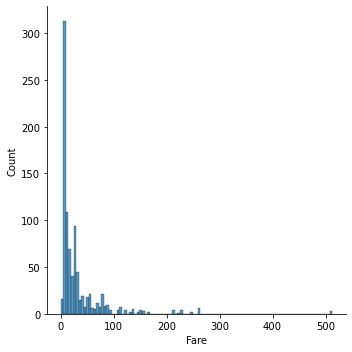

In [9]:
sns.displot(df["Fare"])

* __"Fare"__ Distplot is pretty much skewed, maybe it's better to use the **log form**.
* And clearly we don't have to remove "Fare" column.

In [10]:
df["Ticket"].value_counts()

347082          7
1601            7
CA. 2343        7
347088          6
3101295         6
               ..
312992          1
F.C.C. 13528    1
349209          1
113051          1
36864           1
Name: Ticket, Length: 681, dtype: int64

* Ticket column is like Cabin, so spreaded so we just remove it!

First we check for duplicate names and then remove the Name column

In [11]:
df["Name"].duplicated().sum()

0

* No duplicates!

But wait, maybe we can do a feature engineering and extract titles and form a new columns based on them!

### Feature Engineering Alert!

In [12]:
# Apply function to make the new column
for dataset in combine:
    dataset["Title"] = dataset["Name"].apply(lambda p : p.split()[1])

Now let's see how this `Title` looks like

In [13]:
df["Title"].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Impe,             3
Planke,           3
Col.              2
Mlle.             2
Gordon,           2
Major.            2
der               1
the               1
Carlo,            1
Melkebeke,        1
Jonkheer.         1
Walle,            1
Pelsmaeker,       1
Mme.              1
Steen,            1
Velde,            1
Ms.               1
Billiard,         1
Cruyssen,         1
Don.              1
Shawah,           1
Mulder,           1
Capt.             1
Messemaeker,      1
Name: Title, dtype: int64

Under 40 observations won't contribute much to the model. so let's just perform __one hot encoding__ to these titles and lets see what happens!

First of all let's transform everything beside [Mr., Miss., Mrs., Master.] to `Pal.`  

In [14]:
accetable_titles = ["Mr.", "Miss.", "Mrs.", "Master."]
def change_title(tit):
    if tit in accetable_titles:
        return tit
    else:
        return "Pal."

In [15]:
for dataset in combine:
    dataset ["Title"] = dataset["Title"].apply(lambda p : change_title(p))

Now we're done with `Name` and it's time to say bye!

In [16]:
for dataset in combine:
    dataset.drop(["Cabin","Ticket","PassengerId","Name"],axis = 1, inplace=True)

In [17]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.
5,0,3,male,NaN,0,0,8.4583,Q,Mr.
6,0,1,male,54.0,0,0,51.8625,S,Mr.
7,0,3,male,2.0,3,1,21.0750,S,Master.
8,1,3,female,27.0,0,2,11.1333,S,Mrs.
9,1,2,female,14.0,1,0,30.0708,C,Mrs.


## 5. Looking for missing data

In [18]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent    

In [19]:
missing_percent(df)

Embarked     0.224467
Age         19.865320
dtype: float64

__1. Let's deal with Age__

In [20]:
df["Age"].isnull().sum()

177

__Roughly 20% of the age data is missing, so we just put the mean age for each sex__.

In [21]:
import math
female_mean, male_mean = df.groupby("Sex")["Age"].mean()
def fill_age(age,sex):
    if math.isnan(age):
        if sex == "male":
            return male_mean
        else:
            return female_mean
    else:
        return age

In [22]:
for dataset in combine:
    dataset["Age"] = dataset.apply(lambda row : fill_age(row["Age"],row["Sex"]),axis = 1)
# df['Q'] = df.apply(lambda row: EOQ(row['D'], row['p'], ck, ch), axis=1)


__2. Now it's embarked time!__

In [23]:
df["Embarked"].isnull().sum()

2

* Only 2 rows are missing so we just delete those rows.

In [24]:
for dataset in combine:
    dataset = dataset.dropna()

## 6. EDA!

First things first lets see how `Sex` could affect your life back then!

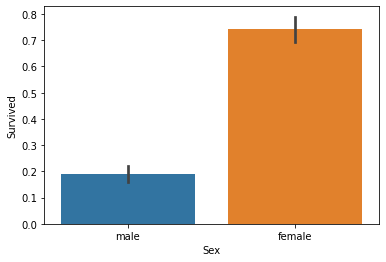

In [25]:
sns.barplot(x = df["Sex"], y = df["Survived"])
plt.show()

##### Females tend to survive more by a large margin!

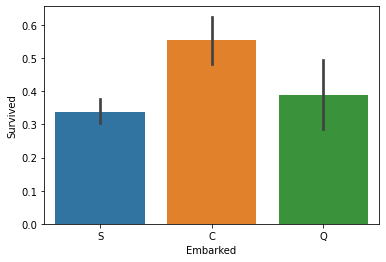

In [26]:
sns.barplot(x = df["Embarked"], y = df["Survived"])
plt.show()

###### Less survival rate by S embark, So there must be some relations!

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


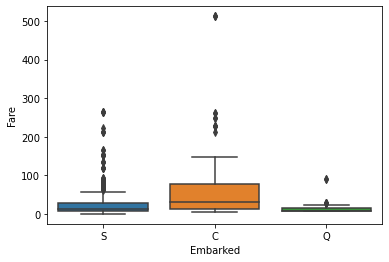

In [28]:
sns.boxplot(x = df["Embarked"], y = df["Fare"])
plt.show()

 Strong outliers over 400 price, Let's just remove them for now and take a better look 

In [29]:
index = df[df["Fare"] > 450 ].index
df.drop(index, axis = 0, inplace=True)

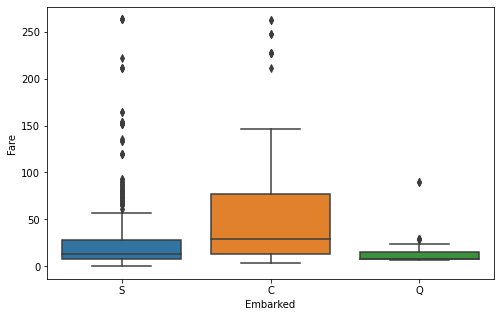

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df["Embarked"], y = df["Fare"])
plt.show()

##### 1. C embark is more expensive, maybe we can conclude that it's more premium than the others and maybe have better health guards and whatever, but clearly, if you paid more you had better chances of surviving.
##### 2. But Q embark is cheaper than S and interestingly, it has a better survival rate, so maybe your placement in ship matters more because these embarks show each cluster of people who are entering the ship simultaneously.

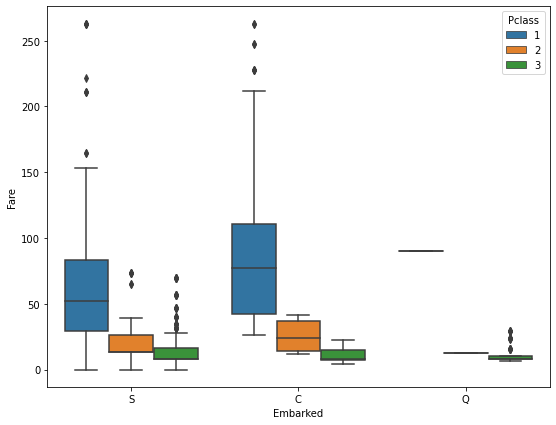

In [31]:
plt.figure(figsize=(9,7))
sns.boxplot(x = df["Embarked"], y = df["Fare"],hue = df["Pclass"])
plt.show()

##### So Q is mainly for the lower class and C can match our theory, Richer people got on board from C.

##### So now let's explore the mean age of each embark:

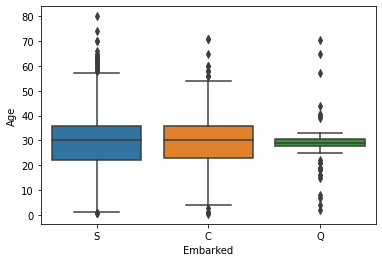

In [32]:
sns.boxplot(y = df["Age"], x = df["Embarked"])
plt.show()

##### It's pretty much normal so nothing to be worry about!

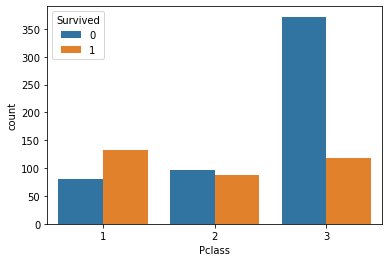

In [33]:
sns.countplot(x = df["Pclass"], hue = df["Survived"])
plt.show()

##### Wow, such discrimination! unfortunately, class 3 almost didn't make it alive :(

Money really could've bought you, your life!

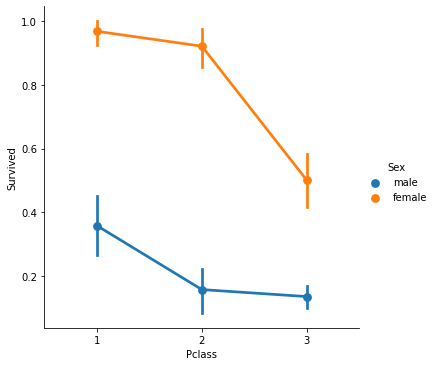

In [34]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()

Women on class 1 and 2 was almost invincble, Hmmm...

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

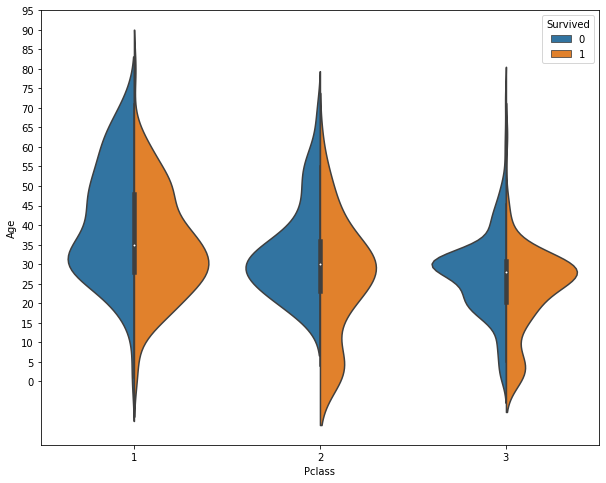

In [35]:
plt.figure(figsize=(10,8))
plt.yticks(range(0,110,5))
sns.violinplot(x = df["Pclass"], y = df["Age"], hue = df["Survived"],split = True)

Looks like rich kids stole the show! (Doin fancy stuff on board =))

Early on, we concluded that rich people got on board from C embark Let's see now if Pclass agrees with us or Nah?

<AxesSubplot:xlabel='Pclass', ylabel='count'>

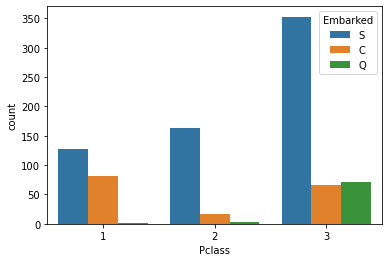

In [36]:
sns.countplot(df["Pclass"], hue = df["Embarked"])

At least we can agree on that Q embark wasn't for riches.

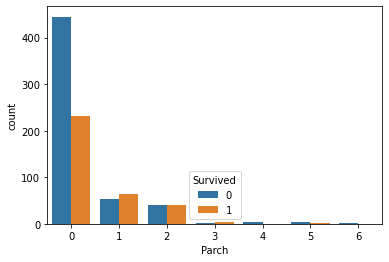

In [37]:
sns.countplot(df["Parch"], hue=df["Survived"])
plt.show()

Text(0, 0.5, 'Chance of survival')

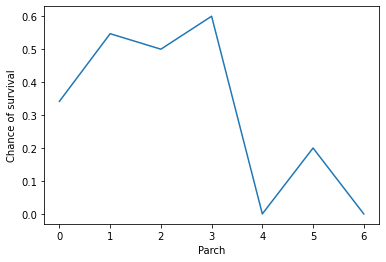

In [38]:
plt.plot(df.groupby("Parch")["Survived"].mean())
plt.xlabel("Parch")
plt.ylabel("Chance of survival")

Huge dropoff in Parch = 4 and then a sudden rise in 5. 
Maybe some sort of correlation is there!

What about our new belvoed `Title` Column? 

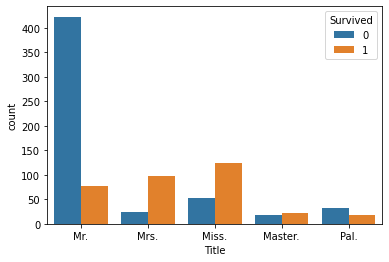

In [39]:
sns.countplot(df["Title"], hue = df["Survived"])
plt.show()

Poor `Mr.`'s they're the real __martyrs__ of the titanic. `Mrs.` and `Miss.` did pretty well surviving. No more feminism talks for now then =))  

Corr matrix time!

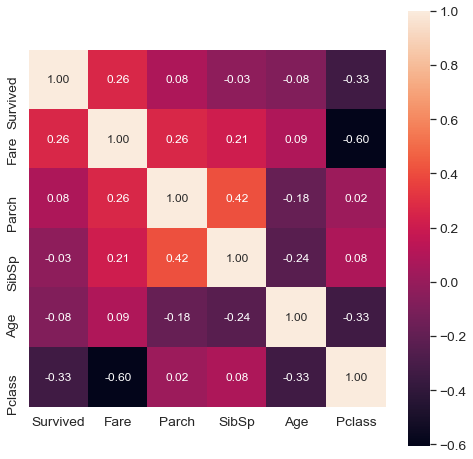

In [40]:
a = df.corr()
plt.figure(figsize=(8,8))
k = 10
cols = a.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### As we can see `Parch` and `SubSp` don't contribute much to the corr matrix so let's do a feature engineering and create a new columns based on `Parch` and `SubSp`.

### Feature Engineering Alert!

In [41]:
for dataset in combine:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"] + 1

Now let's see the corr matrix again.

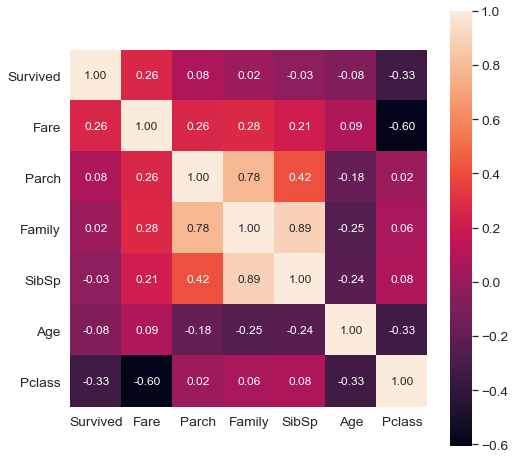

In [42]:
a = df.corr()
plt.figure(figsize=(8,8))
k = 10
cols = a.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

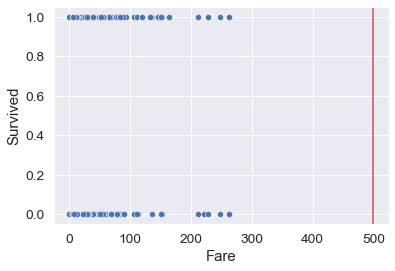

In [43]:
sns.scatterplot(x = df["Fare"], y = df["Survived"])
plt.axvline(500, color = 'r')

* One outlier after 500 

In [44]:
index = df[df["Fare"] > 500].index
df.loc[index,:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family


In [45]:
df.drop(index,inplace=True)

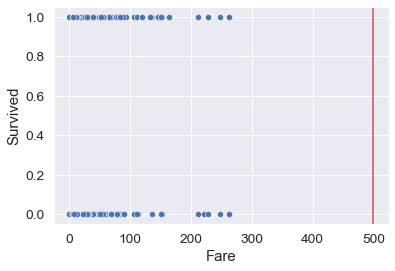

In [46]:
sns.scatterplot(x = df["Fare"], y = df["Survived"])
plt.axvline(500, color = 'r')

## 7. Feature Selection

We have to change our categorical features to numerical.

In [47]:
# def change_sex(sex):
#     if sex == "male":
#         return 1
#     elif sex == "female":
#         return 0

__Male will be 1 and female will be 0__

In [48]:
# df["Sex"] = df.apply(lambda row : change_sex(row["Sex"]),axis = 1)

But this approach isn't ideal because we're turning them into ordinal format and it's not right for our model.

In [49]:
df["Embarked"].value_counts()

S    644
C    165
Q     77
Name: Embarked, dtype: int64

* S -> 0
* C -> 1
* Q -> 2

In [50]:
def change_em(em):
    if em == "S":
        return 0
    elif em == "C":
        return 1
    elif em == "Q":
        return 2

In [51]:
# df["Embarked"] = df.apply(lambda row : change_em(row["Embarked"]),axis = 1)

## Update:

For example, in `Embarked` mapped `Q` to 2 and `C` to 1, so it means `Q`s values are double of `C`. It isn't the best way to deal with categorical data.

Now let's use dummy variable for the better performance

In [52]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0,3,male,22.000000,1,0,7.2500,S,Mr.,2
1,1,1,female,38.000000,1,0,71.2833,C,Mrs.,2
2,1,3,female,26.000000,0,0,7.9250,S,Miss.,1
3,1,1,female,35.000000,1,0,53.1000,S,Mrs.,2
4,0,3,male,35.000000,0,0,8.0500,S,Mr.,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Pal.,1
887,1,1,female,19.000000,0,0,30.0000,S,Miss.,1
888,0,3,female,27.915709,1,2,23.4500,S,Miss.,4
889,1,1,male,26.000000,0,0,30.0000,C,Mr.,1


Now let's change age and fare to range type.

In [53]:
def age_range(val):
    return int(val//10)
for dataset in combine:
    dataset["Age_Range"] = dataset["Age"].apply(age_range)

In [54]:
a = test["Fare"].mean()

In [55]:
test["Fare"] = test["Fare"].fillna(value = a)

In [56]:
def fare_range(val):
    return int(val//15)
for dataset in combine:
    dataset["Fare_Range"] = dataset["Fare"].apply(fare_range)

In [57]:
def change_cols(dataset):
    emb = dataset["Embarked"]
    sex = dataset["Sex"]
    title = dataset["Title"]
    pcl = dataset["Pclass"]
    ag = dataset["Age_Range"]
    fr = dataset["Fare_Range"]
    s = pd.get_dummies(sex, columns=["Sex"], prefix="Sex_is" )
    e = pd.get_dummies(emb, columns=["Embarked"], prefix="Embarked_is" )
    t = pd.get_dummies(title, columns=["Title"], prefix="Title_is" )
    p = pd.get_dummies(pcl,columns=["Pclass"],prefix="Pclass_is")
    q = pd.get_dummies(ag,columns=["Age_Range"],prefix="Age_Range_is")
    m = pd.get_dummies(fr,columns=["Fare_Range"],prefix="Fare_Range_is")

    dataset = dataset.join([s,e,t,p,q,m])
    dataset = dataset.drop(["Embarked","Sex","Pclass","Title","Fare","Age"], axis = 1)
    return dataset
test = change_cols(test)
df = change_cols(df)

In [58]:
df

,Survived,SibSp,Parch,Family,Age_Range,Fare_Range,Sex_is_female,Sex_is_male,Embarked_is_C,Embarked_is_Q,...,Fare_Range_is_5,Fare_Range_is_6,Fare_Range_is_7,Fare_Range_is_8,Fare_Range_is_9,Fare_Range_is_10,Fare_Range_is_14,Fare_Range_is_15,Fare_Range_is_16,Fare_Range_is_17
0,0,1,0,2,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,2,3,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,2,3,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,0,0,1,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,1,2,4,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,1,0,0,1,2,2,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X = df.drop("Survived",axis = 1)
y= df["Survived"]

## 8. Split data

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

## 9. Scaling the features

In [61]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [62]:
X_train

,SibSp,Parch,Family,Age_Range,Fare_Range,Sex_is_female,Sex_is_male,Embarked_is_C,Embarked_is_Q,Embarked_is_S,...,Fare_Range_is_5,Fare_Range_is_6,Fare_Range_is_7,Fare_Range_is_8,Fare_Range_is_9,Fare_Range_is_10,Fare_Range_is_14,Fare_Range_is_15,Fare_Range_is_16,Fare_Range_is_17
110,0,0,1,4,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
149,0,0,1,4,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
329,0,1,2,1,3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
401,0,0,1,2,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
628,0,0,1,2,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0,0,1,3,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
382,0,0,1,3,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
653,0,0,1,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
836,0,0,1,2,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
scaler.fit(X_train)

StandardScaler()

In [64]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Now Let's try Logistic Reggresion

## 10. Train the model

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

## 11. Predicting test data

In [66]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

## 12. Evaluating the model

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [68]:
accuracy_score(y_test, y_pred)

0.8299319727891157

In [69]:
confusion_matrix(y_test, y_pred)

array([[156,  26],
       [ 24,  88]], dtype=int64)

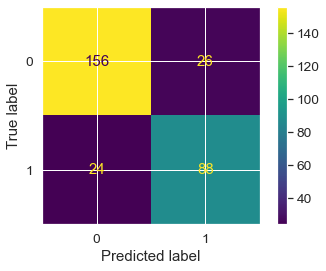

In [70]:
plot_confusion_matrix(model, X_test, y_test)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       182
           1       0.77      0.79      0.78       112

    accuracy                           0.83       294
   macro avg       0.82      0.82      0.82       294
weighted avg       0.83      0.83      0.83       294



### Scored 0.777 with Logistic Regression method

## Now Let's do it with KNN method

## 13. Elbow method for finding the best K values

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    y_pred_knn = knn.predict(X_test)
    
    e = 1 - accuracy_score(y_test,y_pred_knn)
    test_error_rate.append(e)
    

In [73]:
test_error_rate

[0.23129251700680276,
 0.23129251700680276,
 0.2108843537414966,
 0.217687074829932,
 0.19727891156462585,
 0.18707482993197277,
 0.18707482993197277,
 0.20748299319727892,
 0.173469387755102,
 0.18367346938775508,
 0.18367346938775508,
 0.19047619047619047,
 0.19727891156462585,
 0.2108843537414966,
 0.20068027210884354,
 0.217687074829932,
 0.217687074829932,
 0.20408163265306123,
 0.19727891156462585,
 0.20408163265306123,
 0.19387755102040816,
 0.19387755102040816,
 0.19387755102040816,
 0.19387755102040816,
 0.18367346938775508,
 0.19387755102040816,
 0.18707482993197277,
 0.20408163265306123,
 0.19387755102040816]

Text(0.5, 0, 'K Value')

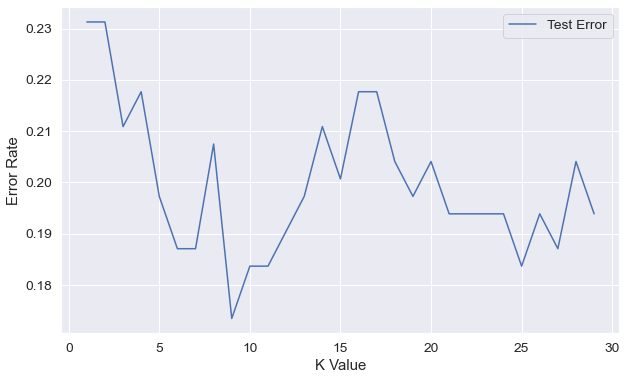

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), test_error_rate, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

### So elbow method shows that best K Values = 5

## Now Let's see what the Grid search method predicts for the K value

## 14. Creating the pipeline

In [75]:
# Scaler for pipeline

sc = StandardScaler()

In [76]:
# Model for pipeline

knn_model = KNeighborsClassifier()

In [77]:
# Operations of pipeline

operations = [("Scaler",sc),("KNN", knn_model)]

In [78]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(operations)

## 15. Finding the best K value with Grid Search

In [79]:
from sklearn.model_selection import GridSearchCV

k_values= list(range(1,20))

In [80]:
# Pipeline keys

pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Scaler', 'KNN', 'Scaler__copy', 'Scaler__with_mean', 'Scaler__with_std', 'KNN__algorithm', 'KNN__leaf_size', 'KNN__metric', 'KNN__metric_params', 'KNN__n_jobs', 'KNN__n_neighbors', 'KNN__p', 'KNN__weights'])

In [81]:
param_grid = {"KNN__n_neighbors" : k_values}

In [82]:
cv_classifier = GridSearchCV(pipe,param_grid=param_grid,scoring="accuracy")
cv_classifier.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             param_grid={'KNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [83]:
# Now let's see what's the best K values

cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('Scaler', StandardScaler()),
  ('KNN', KNeighborsClassifier(n_neighbors=12))],
 'verbose': False,
 'Scaler': StandardScaler(),
 'KNN': KNeighborsClassifier(n_neighbors=12),
 'Scaler__copy': True,
 'Scaler__with_mean': True,
 'Scaler__with_std': True,
 'KNN__algorithm': 'auto',
 'KNN__leaf_size': 30,
 'KNN__metric': 'minkowski',
 'KNN__metric_params': None,
 'KNN__n_jobs': None,
 'KNN__n_neighbors': 12,
 'KNN__p': 2,
 'KNN__weights': 'uniform'}

## Grid search suggests for K values of 15

## Now we check for both 15 and 5

## 16. Final KNN model

In [84]:
# KNN for 5

knn_model_5 = KNeighborsClassifier(n_neighbors=7)
knn_model_5.fit(X_train,y_train)
y_knn_pred_5 = knn_model_5.predict(X_test)

In [85]:
# KNN for 15

knn_model_15 = KNeighborsClassifier(n_neighbors=15)
knn_model_15.fit(X_train,y_train)
y_knn_pred_15 = knn_model_15.predict(X_test)

## 17. Evaluating the KNN models

In [86]:
# Model Report for k = 5

print(classification_report(y_test, y_knn_pred_5))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       182
           1       0.80      0.68      0.73       112

    accuracy                           0.81       294
   macro avg       0.81      0.79      0.79       294
weighted avg       0.81      0.81      0.81       294



In [87]:
# Model Report for k = 15

print(classification_report(y_test, y_knn_pred_15))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       182
           1       0.76      0.70      0.73       112

    accuracy                           0.80       294
   macro avg       0.79      0.78      0.78       294
weighted avg       0.80      0.80      0.80       294



## So clearly K = 5 is our best value for KNN method